### Test hplib mit Temperatur-Profil von pvlib(pvgis)

In [1]:
import os
from hplib import hplib as hpl
from hplib import hplib_database as db
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:

# hplib through pip intsall is not the same as when cloning the repository 'hplib-main'
# titel is missing and load_database() loads a shorter list (the full database is called with load_all_heat_pumps())

database = hpl.load_database()
database_all = hpl.load_all_heat_pumps() 
database.tail(10)

,Manufacturer,Model,Date,Type,Subtype,Group,Refrigerant,Mass of Refrigerant [kg],SPL indoor [dBA],SPL outdoor [dBA],...,p2_P_el_c [1/°C],p3_P_el_c [-],p4_P_el_c [1/°C],p1_EER [-],p2_EER [-],p3_EER [-],p4_EER [-],MAPE_P_el_cooling,MAPE_EER,MAPE_Pdc
501,ait-deutschland,WWC 190H/X,2019-09-06,Water/Water,On-Off,6.0,R407c,4.3,53.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,ait-deutschland,WWC 220H/X,2019-09-06,Water/Water,On-Off,6.0,R407c,4.5,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,tecalor,TTF 35,2016-11-01,Brine/Water,Regulated,2.0,R410a,10.0,56.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,tecalor,TTF 66,2020-12-17,Brine/Water,On-Off,5.0,R410a,14.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Generic,Generic,NaN,Outdoor Air/Water,Regulated,1.0,NaN,NaN,NaN,NaN,...,-0.009208,-1.368638,-69.532741,-13.20985,0.06484,11.520049,12.9614,NaN,NaN,NaN
506,Generic,Generic,NaN,Brine/Water,Regulated,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,Generic,Generic,NaN,Water/Water,Regulated,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,Generic,Generic,NaN,Outdoor Air/Water,On-Off,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,Generic,Generic,NaN,Brine/Water,On-Off,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,Generic,Generic,NaN,Water/Water,On-Off,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bestimmte WP Hersteller & Model

In [3]:
# Zeigt alle Vaillant WPs in database_all
print(database_all.loc[database_all['Manufacturer'] == 'Vaillant Deutschland '])

               Manufacturer                              Model        Date  \
2866  Vaillant Deutschland                   VWF 117/4 35 & 55  2020-12-17   
2867  Vaillant Deutschland                   VWF 118/4 35 & 55  2020-12-17   
2868  Vaillant Deutschland                   VWF 157/4 35 & 55  2020-12-17   
2869  Vaillant Deutschland                   VWF 197/4 35 & 55  2020-12-17   
2870  Vaillant Deutschland                    VWF 57/4 35 & 55  2020-12-17   
2871  Vaillant Deutschland                    VWF 58/4 35 & 55  2020-12-17   
2872  Vaillant Deutschland                    VWF 87/4 35 & 55  2020-12-17   
2873  Vaillant Deutschland                    VWF 88/4 35 & 55  2020-12-17   
2874  Vaillant Deutschland                         VWL 105/6 A  2020-04-12   
2875  Vaillant Deutschland                    VWL 105/6 A 230V  2020-04-12   
2876  Vaillant Deutschland                 VWL 105/6 A 230V S2  2020-04-12   
2877  Vaillant Deutschland                      VWL 105/6 A S2  

In [4]:
print(database_all.loc[database_all['Model'] == 'VWL 75/6 A 230V'])

               Manufacturer            Model        Date               Type  \
2912  Vaillant Deutschland   VWL 75/6 A 230V  2020-04-12  Outdoor Air/Water   

        Subtype  Group Refrigerant  Mass of Refrigerant [kg]  \
2912  Regulated    1.0        R290                       0.9   

      SPL indoor [dBA]  SPL outdoor [dBA]  ...  p3_P_th [-] p4_P_th [1/°C]  \
2912               NaN               55.0  ...     0.988344      34.878863   

      p1_P_el_h [1/°C]  p2_P_el_h [1/°C]  p3_P_el_h [-]  p4_P_el_h [1/°C]  \
2912        269.627992          0.008382       0.168907       -269.684057   

      p1_COP [-]  p2_COP [-]  p3_COP [-]  p4_COP [-]  
2912  141.776708   -0.091518    7.313192 -141.612706  

[1 rows x 27 columns]


In [5]:
# Findet WP mit gleichen Werten wie Vaillant-Model für die Simulation - simulate funktioniert nur mit database, nicht mit database_all

same = hpl.Same_Built()
hp_vaillant = same.all_to_database(modelname ='VWL 75/6 A 230V')
hp_vaillant

'HA 7-6 O 230V'

In [6]:
parameters_v = hpl.get_parameters('HA 7-6 O 230V')
parameters_v

,Manufacturer,Model,MAPE_COP,MAPE_P_el,MAPE_P_th,P_th_h_ref [W],P_el_h_ref [W],COP_ref,Group,p1_P_th [1/°C],...,p3_Pdc [-],p4_Pdc [1/°C],p1_P_el_c [1/°C],p2_P_el_c [1/°C],p3_P_el_c [-],p4_P_el_c [1/°C],p1_EER [-],p2_EER [-],p3_EER [-],p4_EER [-]
0,Saunier Duval Brand Group,HA 7-6 O 230V,12.267727,4.059529,11.147301,5420.0,2545.0,2.13,1.0,-34.903971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Generic HP - WP mit Mittelwerte aller WPs als Parameter

In [7]:
# There are now only generic average:
# group 1 is Outdoor Air/Water & Regulated
# group 4 is Outdoor Air/Water & On-Off

parameters = hpl.get_parameters(model='Generic', group_id=1, t_in=-2, t_out=60, p_th=7000)
parameters


,Manufacturer,Model,MAPE_COP,MAPE_P_el,MAPE_P_th,P_th_h_ref [W],P_el_h_ref [W],COP_ref,Group,p1_P_th [1/°C],...,p4_Pdc [1/°C],p1_P_el_c [1/°C],p2_P_el_c [1/°C],p3_P_el_c [-],p4_P_el_c [1/°C],p1_EER [-],p2_EER [-],p3_EER [-],p4_EER [-],EER_ref
0,Generic,Generic,NaN,NaN,NaN,8060.732466,5702.189209,1.413621,1.0,64.083191,...,-71.453504,69.600608,-0.009208,-1.368638,-69.532741,-13.20985,0.06484,11.520049,12.9614,3.278167


## Simulation

### One Timestep

In [8]:
# Generic
# Create heat pump object with parameters
heatpump = hpl.HeatPump(parameters)
# Simulate with values
# whereas mode = 1 is for heating and mode = 2 is for cooling
results = heatpump.simulate(t_in_primary=-7, t_in_secondary=35, t_amb=-7, mode=1)
print(pd.DataFrame([results]))


   T_in  T_out  T_amb       COP  EER         P_el          P_th     m_dot
0    -7     40     -7  2.464421    0  4829.882627  11902.863167  0.566803


In [9]:
# Vaillant
#  Create heat pump object with parameters
heatpump_v = hpl.HeatPump(parameters_v)
# Simulate with values
# whereas mode = 1 is for heating and mode = 2 is for cooling
results_v = heatpump_v.simulate(t_in_primary=-7, t_in_secondary=35, t_amb=-7, mode=1)
print(pd.DataFrame([results_v]))

   T_in  T_out  T_amb       COP  EER         P_el         P_th     m_dot
0    -7     40     -7  2.504442    0  2281.999921  5715.137175  0.272149


### Time Series

#### Generate T_amb Profile 

In [10]:
# For pvlib (data['temp_air'])
import pvlib
import pandas as pd # 'as pd' to change alias from pandas to pd
import matplotlib.pyplot as plt
import pgeocode
import datetime
from datetime import time as settime

# Input
plz = 40599
anlage_groesse = 10 
strom_bedarf = 4000
waerme_bedarf = 20000
year = 2016

# Get Laittude & Longitude
nomi = pgeocode.Nominatim('de') 
a = nomi.query_postal_code(plz)
latitude = a['latitude']
longitude = a['longitude']

# Get hourly solar irradiation and modeled PV power output from PVGIS -> we will only use 'temp_air'
data, meta, inputs = pvlib.iotools.get_pvgis_hourly(latitude, longitude, start=2016, end=2016, surface_tilt=35,
                                                    pvcalculation=True, peakpower=anlage_groesse, mountingplace='building', loss = 0)  

# Set Date as Index for data
data.set_index(pd.date_range(datetime.datetime(year, 1, 1, 0), periods= len(data), freq="h"), inplace=True)

# for Outdoor Air/Water -> T_in_primary and t_amb have the same values --> variable name is temperature
temperature = pd.DataFrame(data['temp_air']) # from pvgis
temperature

,temp_air
2016-01-01 00:00:00,4.55
2016-01-01 01:00:00,4.70
2016-01-01 02:00:00,4.84
2016-01-01 03:00:00,4.99
2016-01-01 04:00:00,4.82
...,...
2016-12-31 19:00:00,-1.74
2016-12-31 20:00:00,-1.94
2016-12-31 21:00:00,-2.15
2016-12-31 22:00:00,-2.15


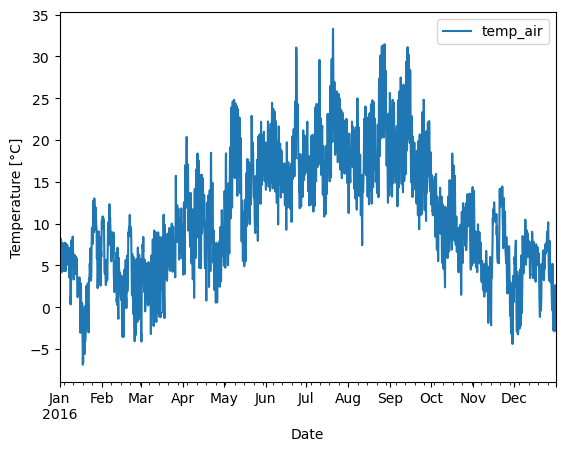

In [11]:
# Plot temperature profile
ax = temperature.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Temperature [°C]")
plt.show()

#### Generate T_in_secondary Profile 

In [12]:
## Generate T_in_secondary Profile

# we don't have t_in_secondary values (T in lowest level of buffer tank)
# What hplib does is: The t_in_secondary is supposed to be heated up by 5 K which then results in output temperature.
# randomized df for t_in_secondary (values between 30 and 40°C)
# Set the random seed for reproducibility
np.random.seed(0)

## Generate random numbers between 30 and 40, for data.len() -> length of df
random_t_in_secondary = np.random.uniform(30, 40, len(temperature))
random_t_in_secondary = np.round(random_t_in_secondary, 1) # rounds to one decimal

# # Add t_in_seconday to temperature df
temperature['t_in_secondary'] = random_t_in_secondary
temperature

,temp_air,t_in_secondary
2016-01-01 00:00:00,4.55,35.5
2016-01-01 01:00:00,4.70,37.2
2016-01-01 02:00:00,4.84,36.0
2016-01-01 03:00:00,4.99,35.4
2016-01-01 04:00:00,4.82,34.2
...,...,...
2016-12-31 19:00:00,-1.74,36.4
2016-12-31 20:00:00,-1.94,36.2
2016-12-31 21:00:00,-2.15,31.0
2016-12-31 22:00:00,-2.15,34.1


#### Simulation & Results

In [13]:
# Generic
# Simulation using temperature df, parameters from
results_df = heatpump.simulate(t_in_primary=temperature['temp_air'].values, t_in_secondary=temperature['t_in_secondary'].values, t_amb=temperature['temp_air'].values, mode=1)

results_df = pd.DataFrame.from_dict(results_df)
results_df

,T_in,T_out,T_amb,COP,EER,P_el,P_th,m_dot
0,4.55,40.5,4.55,4.199911,0,1612.375293,6771.831943,0.322468
1,4.70,42.2,4.70,4.074155,0,1680.337134,6845.953271,0.325998
2,4.84,41.0,4.84,4.200802,0,1563.178314,6566.601906,0.312695
3,4.99,40.4,4.99,4.276449,0,1482.088706,6338.076784,0.301813
4,4.82,39.2,4.82,4.355341,0,1452.156903,6324.637904,0.301173
...,...,...,...,...,...,...,...,...
8779,-1.74,41.4,-1.74,3.152128,0,3440.564083,10845.099832,0.516433
8780,-1.94,41.2,-1.94,3.138832,0,3483.878583,10935.309000,0.520729
8781,-2.15,36.0,-2.15,3.561828,0,3205.981966,11419.156778,0.543769
8782,-2.15,39.1,-2.15,3.290371,0,3406.877398,11209.892082,0.533804


In [14]:
# Vaillant
results_v_df = heatpump_v.simulate(t_in_primary=temperature['temp_air'].values, t_in_secondary=temperature['t_in_secondary'].values, t_amb=temperature['temp_air'].values, mode=1)

results_v_df = pd.DataFrame.from_dict(results_v_df)
results_v_df

,T_in,T_out,T_amb,COP,EER,P_el,P_th,m_dot
0,4.55,40.5,4.55,4.352901,0,644.654125,2806.115412,0.133625
1,4.70,42.2,4.70,4.221920,0,659.518125,2784.432457,0.132592
2,4.84,41.0,4.84,4.354702,0,613.942150,2673.535069,0.127311
3,4.99,40.4,4.99,4.434213,0,579.739358,2570.687944,0.122414
4,4.82,39.2,4.82,4.516155,0,578.395754,2612.124973,0.124387
...,...,...,...,...,...,...,...,...
8779,-1.74,41.4,-1.74,3.238964,0,1561.343227,5057.135259,0.240816
8780,-1.94,41.2,-1.94,3.224468,0,1585.613562,5112.759992,0.243465
8781,-2.15,36.0,-2.15,3.665924,0,1504.643809,5515.909341,0.262662
8782,-2.15,39.1,-2.15,3.382216,0,1570.777311,5312.708730,0.252986


##### COP - Distribution of COP, SPF 

COP_Mittelwert:  5.2
The seasonal performance factor (SPF) for one year is = 4.9


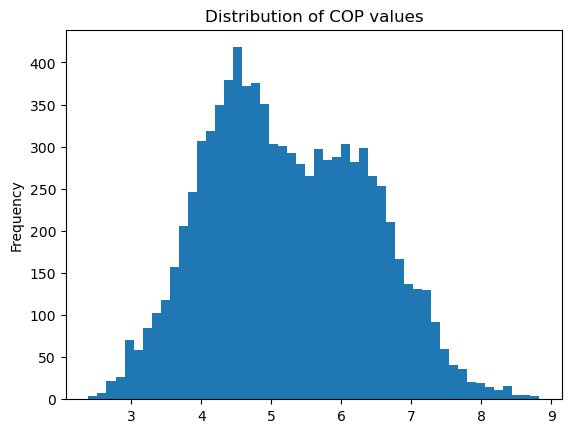

In [15]:
# Generic
# Plot COP Distribution
results_df['COP'].plot.hist(bins=50, title='Distribution of COP values') 

# Mean COP
print('COP_Mittelwert: ', round(results_df['COP'].mean(), 1))

# Calclulate seasonal performance factor (SPF)
SPF = results_df['P_th'].mean() / results_df['P_el'].mean() 
print('The seasonal performance factor (SPF) for one year is = '+str(round(SPF,1)))


COP_Mittelwert:  5.5
The seasonal performance factor (SPF) for one year is = 5.2


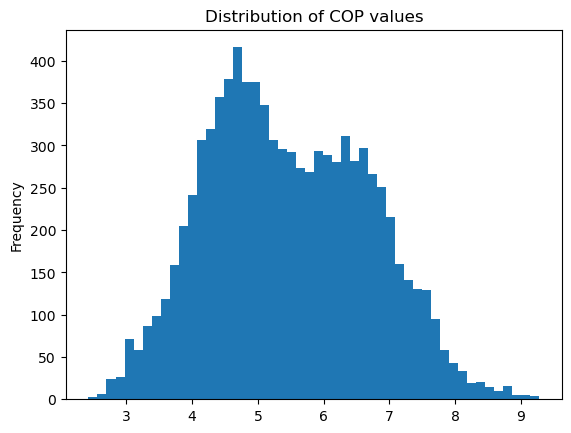

In [16]:
# Vaillant
results_v_df['COP'].plot.hist(bins=50, title='Distribution of COP values') 
print('COP_Mittelwert: ', round(results_v_df['COP'].mean(), 1))
SPF = results_v_df['P_th'].mean() / results_v_df['P_el'].mean() 
print('The seasonal performance factor (SPF) for one year is = '+str(round(SPF,1)))


##### Ploting some results

<function matplotlib.pyplot.show(close=None, block=None)>

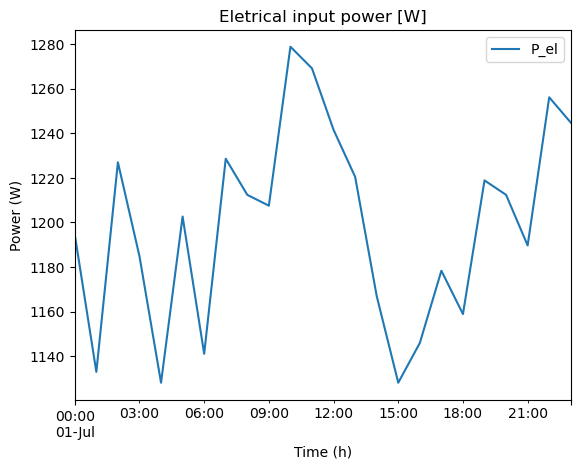

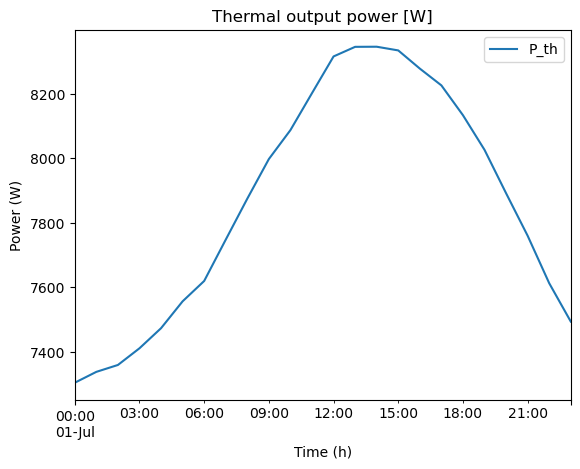

In [17]:
# Plot 1 day, P_el

# Change Index to Date
results_df.set_index(pd.date_range(datetime.datetime(year, 1, 1, 0), periods= len(results_df), freq="h"), inplace=True)

tag = results_df.loc['2016-07-01 00:00:00':'2016-07-01 23:00:00', ['P_el']]
tag_plot = tag.plot()
tag_plot.set_title('Eletrical input power [W]')
tag_plot.set_xlabel('Time (h)')
tag_plot.set_ylabel('Power (W)')
plt.show

# Plot 1 day, P_th

tag = results_df.loc['2016-07-01 00:00:00':'2016-07-01 23:00:00', ['P_th']]
tag_plot = tag.plot()
tag_plot.set_title('Thermal output power [W]')
tag_plot.set_xlabel('Time (h)')
tag_plot.set_ylabel('Power (W)')
plt.show

P_el_gesamt (kW):  12903.12


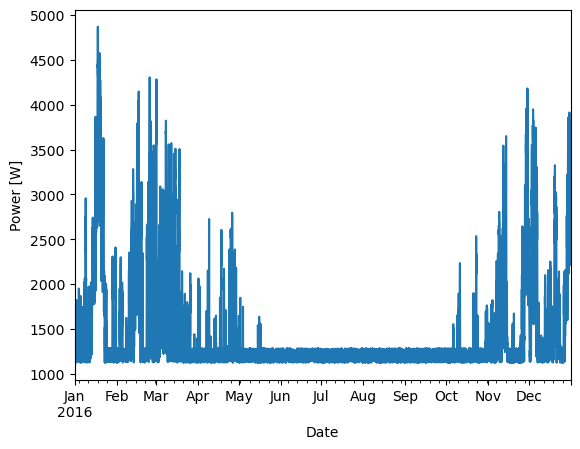

In [18]:
# Plot P_el (year)

p_el = results_df['P_el']
vx = p_el.plot()
vx.set_xlabel("Date")
vx.set_ylabel("Power [W]")

print('P_el_gesamt (kW): ', round(p_el.sum()/1000, 2))

P_th_gesamt (kW):  63704.09


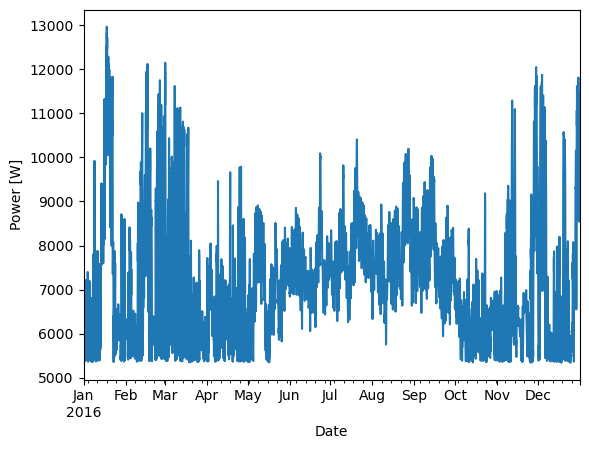

In [19]:
# Plot P_th (year)
p_th = results_df['P_th']
vx = p_th.plot()
vx.set_xlabel("Date")
vx.set_ylabel("Power [W]")

print('P_th_gesamt (kW): ', round(p_th.sum()/1000, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

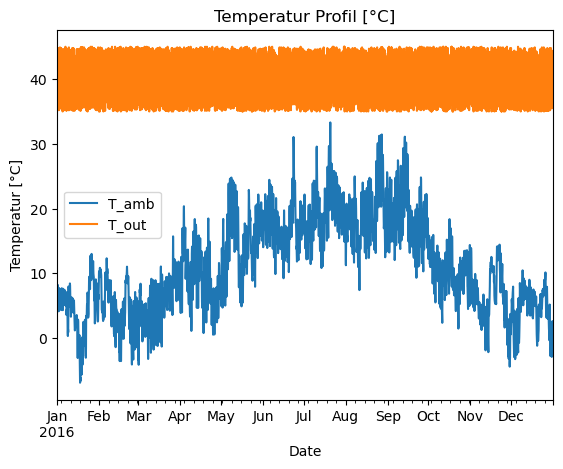

In [21]:
# Plot T_in & T_out

temp = results_df[['T_amb', 'T_out']]
vx = temp.plot()
vx.set_xlabel("Date")
vx.set_ylabel("Temperatur [°C]")
vx.set_title('Temperatur Profil [°C]')
plt.show